In [1]:
using DrWatson
@quickactivate "BNP2"
using Turing, BSON
using StatsPlots: StatsPlots
const splot = StatsPlots.plot
using Revise, BNP2

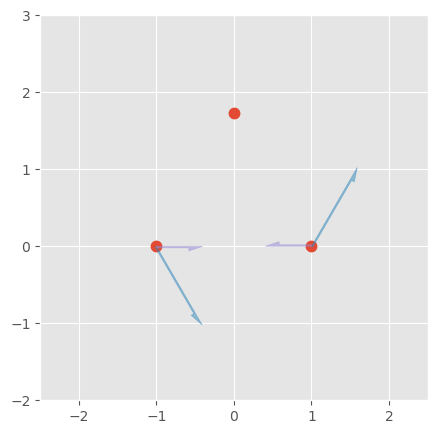

In [3]:
TBP = (
    ms = fill(5e10, 3),
    qs = [[-1,  0],[ 1,  0], [ 0, √3]],
    ps = [[cos(π/3), -sin(π/3)], [cos(π/3),  sin(π/3)], [cos(π/1),  sin(π/1)]] .+ [[0.0, 0]],
    do_addnoise = true, 
    σ = 0.2,
)

let prob = TBP
    o1, o2, o3 = Particle.(prob.ms, prob.qs, prob.ps)
    
    ###
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.0, 3.0])
    plot!(ax, o1; do_plotvelocity=true)
    plot_force!(ax, o1, forceof(o1, o2))
    plot!(ax, o2; do_plotvelocity=true)
    plot_force!(ax, o2, forceof(o2, o1))
    plot!(ax, o3)
    fig |> display
end

;

In [3]:
traj = 
let prob = TBP, n_steps = 50
    space = Space(Particle.(prob.ms, prob.qs, prob.ps))
    @info "" positionof(space) velocityof(space) stateof(space) accelerationof(space)
    
    traj = simulate(space, DiffEqSimulator(1e-1), 2 * n_steps)
    HTML(animof(positionof.([space, traj...])).to_html5_video()) |> display
    
    traj = traj[1:n_steps]
    if prob.do_addnoise
        map(traj) do env
            q, p = positionof(space), velocityof(space)
            q, p = q + prob.σ * randn(size(q)), p + prob.σ * randn(size(p))
            reconstruct(env, q, p)
        end
    else
        traj
    end
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABvw21kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACltliIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGWbfzhEj8xQEA3Pb/v95Fxto07V/I\nWQOh26ujrV8O6+MugcEpCsPPQPNSRO17ZaKxBe1QvQ9ODo0qwaAMv0MGg7yK7acoO59SQ63DyFLy\n7R0lYFNyAzWS+P0WXuuBY0uTlLHZDBqRzxTupbGelEU/IzySty7yiWMA6bIG+igqjfgp0O45nXMc\nojPppo/YZqHCBqJTGSZo69ebsvW3gd8wLVqydhT15wKTAv4AAAMANkULUcv2JFsQOc8HieWNmnYu\nB5VsilhQ//LslJd4Sd0ZMrENE6vzThcqJXti2S9OYgNdnFTD9BVK8x8vpHwJ3X4rHL1ST3/ovE6i\nb2EMn028pDLHqKsEBF3qiyp3Ky+HO0hLI08qnIOMhjxKzXOMylSgPTLhD6yGhI3ov9Qit/g754vE\nBGqtwYvcwQ/3kMMJ4KKGVcATyvKBD+aI+DQAZ2WiSm0Ey4h0s+2rTZB+QAAAAwAO/MhTSyh/i7Cd\nbWdJnWbAHZWOubEoyYG4dP0U23jnziJVC8A4sOcVq7C6noIfZZlyGl7+dy7/n5H+TPj6DXB6VC+x\n4futika0hiXxu65oGZ3dS/rdJ0LfFLGFGGCCICVq3UTuhrweXs3fgKUNGpKjua5k5quJu9DStzpK\nCPboFvpbVqKI/+wJRCE7E06gjHErjw840P9FUq6BsnSMvsUEAnw3fK7kGzhobCcUuXD5EG/D57MM\n56ICOUoekLbMQtaxedv93qQ7z8YrnDw0ftQylk+eZHIg2/VOLnqXyidUwNW43lk1TRqp/QXPmIEN\n9DGqXeAAAAMBS9P6wr0oSLKAAC6std5miUcT5fxVdvPlJD2pqUGtkWKYIyZn3dMLgxH6zmLfUx1g\nrW2fVqQUwtt7nWy080lGJx0ADvSx6fVCfwxRpKAuskEXPeQOyvNDB/GC3mN4d4e+DDbU3NsFTa2H\nTYNEmgO5ZPCaAAtEh5f6fa7ujd3iWQdUrea8EIiPKi+e/4ST3MbcBRt4Uf4kqOy7dROhNZf4abux\n5IPWbv9U4cqyZdwleC29iW8Gy5TFtutNlV4h3/Ma1nPtLyax7J6PhEMQ03P/p7Rbz24YQRYWM7La\noo1X6X+49F/pYgSEYwVLg/5h5dpCLDDv8dDS0+peOThWocOyGMgAAAMBabdOUOQJmC5AAAADACPq\nbTfJXsD/XTF+3mbkP9wTtQa17m+jJrcmZ2gc6RvOeAj8+4t8fOJ6bE3COYlEyKpsUrS6KqS8aVxH\nAGwXOajZnOYX79jsktPIWQLDyZBwGullqNRWVfnFKJcNbgiBD5YnZWU6zlds8iQw1km7Np3SW88j\np2cuVnN3Y7khtWknEh+4hrYN1YQLmhAgMjguVK4VbKVFsz8ik/1ryNQGWROxOiaVCXJCrvuhXJcZ\n6jO8768EwApBNjFJvSGwL+yYije92X67129sk+uEhGB4qKISzOvUKlNDCVcFJYuS7Kqg5sBOZjFO\nEuxOIV02dmLYEx975h/kZa/hYDFPSg/1OHlRuivmnIfi3tictvrVJa+yFbw2rcvrGcQwHazazW7J\naAoTcb9XM2BnfY3+ag3Wh/stn7ESiATxN1PE1SLkg3hJUYQTduTQfScIQm8ci4ntlT0BQOD8nlXM\ns7y97gxVEHG5/tCrIKuPPn8pRE+bV8AC1qlkXmXnhEkpLVNhvmBN73n79sz7F8Nx7J6c2KwI6/Jw\nipfdOnLLrSEAv1b4UMYcgZP0xHHMeHc++Gmj2s8Mi1m+Y/YHUkkAAAMALh/LD9ajYGSgNAGjBQEz\nsDi5whTES6HTyH1PdKmV7AABAyGjHtZlQxY1y/TWCqJIdARLCAHu85jZ0WBvKrfxxzpsBxWXhBGg\nNHA7tYpq4wU7JoXfGnmEm7koAM8YqMmcnmuCgU2kB9dUPGsR8LMQFWe1yKSefdXP26vpXKI4MbZl\nWu7eTs88hDXcumb58GTEvLNL9a1gOhcOexhxADvVEIVMXy834+QofJRKib4vw9x68iJ+vheL5fV+\n1UUJLIcOp0DorChIMys7ezz49oKAOC9QaLb9CW0R/KCNrX/qO5KAAAAQTfuVEBuFCa8AAAMAAChT\nvOtfROpPQi/5wQjIpQ5tP7XwEXlbYM4EymFIX1OmUDLKZV2TKdPlPAZy3OTY9OycDFv0FN2v+PZz\nTyvi8abREMbJ8TGOn50PfPahKJqZ7C3jfdmrAZjMpEI1hTK8WxRaC1Hx8ji9QIdXrL2DjXJ2RHE/\n3B2o+wp+h68i/J/EVwa75N7aIPIVovd5XSjucXJQmT9/gr46DnxUGva8lp9swBHzrBqVe0bAPVeX\n36K+Q2mEt4B/XPOh3QwVQf+J3herGGWk4Uqbol9VNWAAABO/rEyaDEJhyiNxvzHRleOuiVaWi6Tu\nUBSLpNmWArlEwl7rbn0lciUOf97HJ3R+3IAUy6BPZYfV737BjQ/IE6P0h1VVA3tQajcaz+jzIIQb\nnPX9ci8cfbq3FIRpnLgCq9iV47QGEm52tWKyWxH90LRHJBJ5cC4Po4sy9agmsL4hRCEzx2tcMbEa\n5UuNIUdM1RX1lAFkFbg0D5Phck8FVP8ixhHmbuWq8kJR4GFOvNcn84nlW4KsomaD3f/WM5Ebqvmk\nDWeQK6SF3gYV/RoUb5lD1Z7JqFlYDWGexhnFI8T9wAi5sKOUMD9IQq0XJS5pA2fB/igyOI1pXtu2\nkdn28FrHmuT/hvsFADVFAyTJef9ASU/O6Kp4OYLZAZzV5J

┌ Info: 
│   positionof(space) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772]
│   velocityof(space) = [0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
│   stateof(space) = 12-element LabelledArrays.SLArray{Tuple{12},Float64,1,12,(q = 1:6, p = 7:12)} with indices SOneTo(12):
 :q => -1.0                  
 :q => 0.0                   
 :q => 1.0                   
 :q => 0.0                   
 :q => 0.0                   
 :q => 1.7320508075688772    
 :p => 0.5000000000000001    
 :p => -0.8660254037844386   
 :p => 0.5000000000000001    
 :p => 0.8660254037844386    
 :p => -1.0                  
 :p => 1.2246467991473532e-16
│   accelerationof(space) = [1.2514312500000002, 0.72251416905981, -1.2514312500000002, 0.72251416905981, 0.0, -1.44502833811962]
└ @ Main In[3]:4


In [4]:
@model three_body(ms, states) = begin
    u ~ MvNormal(zeros(12), 5)
    q, p = u[1:6], u[7:12]
    space = Space(Particle.(ms, q, p))
    for i in 1:length(states)
        space′ = transition(space, 1e-1)
        states[i] ~ MvNormal(stateof(space′), 5e-1)
        space = space′
    end
end

mf = 
let prob = TBP
    three_body(prob.ms, stateof.(traj))
end

@time chn = sample(mf, NUTS(50, 0.65), 300)

chn |> display

let prob = TBP
    bson("three_body-noise=$(prob.do_addnoise).bson", chn = chn)
end

;

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


Object of type Chains, with data of type 250×24×1 Array{Real,3}

Iterations        = 1:250
Thinning interval = 1
Chains            = 1
Samples per chain = 250
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = u[1], u[2], u[3], u[4], u[5], u[6], u[7], u[8], u[9], u[10], u[11], u[12]

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters     mean     std  naive_se    mcse      ess   r_hat
  ──────────  ───────  ──────  ────────  ──────  ───────  ──────
        u[1]  -0.0833  0.0908    0.0057  0.0361   6.1903  1.0872
        u[2]   0.8397  0.4027    0.0255  0.2115   4.7005  1.1912
        u[3]  -0.5996  0.1162    0.0073  0.0544   5.7536  1.1370
        u[4]   0.3676  0.3760    0.0238  0.1919   4.7712  1.1759
        u[5]   1.0055  0.4561    0.0288  0.2290   5.4250  1.1733
        u[6]   1.8124  1.1843    

 80.001414 seconds (342.38 M allocations: 44.199 GiB, 10.34% gc time)


In [8]:
let prob = TBP, n_skips = 100, U = hcat(get(chn[n_skips+1:end], [:u]).u...)', n_steps = 4 * 50, do_map = true
    do_map && (U = mean(U; dims=2))
    q̂s = zeros(6, n_steps)
    for n in 1:size(U, 2)
        u = U[:,n]
        q, p = u[1:6], u[7:12]
        space = Space(Particle.(prob.ms, q, p))
        traj = simulate(space, 1e-1, n_steps)
        q̂s = q̂s + hcat(positionof.(traj)...)
    end
    q̂s = q̂s / size(U, 2)
    HTML(animof(q̂s).to_html5_video()) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAABKEW1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAFNVliIQAP//+92ifAptaQ3qA\n5JXFJdtPgf+rZ3B8j+kDAAADAAADACQC/Me/oQdDNCAAAE9ABI85/CPLriAlvARpFcT7AY2egBSZ\neewOGAmWfVKGoIgnLxMBVUtsvdYaLZWBN21vf0iX4cuLDK+38u+y5fA78WJpKu6v2wnPxySggbz7\nH7IGqArdAS32TK6Cd/Tq5/FfD93eRw/BtK7GZmKeVWoClr2+moGGNkhFMSdYOVzdTvFvp1+BVhTd\n3mKx09FGkjR4d37t8FhGUSHOxqRM17pcqSjcjgzZaPLCYZfctBZTmMrfaTaI8+QfUqhIDKW1qwcr\nzkQELULJbfPoh/7869K0FgkxF+lPtH/x2nA1EB9Ddht7ASUSInIN4bXwQS8GuMJHwRN+ZIn8WXHd\ni6shH3UzPpLsWNQRzOTTJamIZ+PLzjlMvlI6YPievWBs+GD/hGSu9rLlzEIyJqpyyDrx4l1LmdFN\nDrepipCM74X9xzlWRFD5OcfK+yrDxX0LMALfeZopF864gUanM0a3luGYDywbJ9ys0uwoU1HwR5pr\n3iR8qRPtHjcsKsMWkGYpPNINGmAVsxwu1XerVutg/zFCRV/EQlpjU5mzJUY9mYgvgSmQ2tgMBpsC\nFaYD/4/yn07N6TU5K6iHCpAiMsyitNlzK2PxzHdVz0+7nUilM3gqr5gFdZWLYoJe5hPCBRDILZEt\nhbEREkwvujYJqAQ0SKisKghvUBOD1B07P7t1y2Ml6e8TF+ey5Sqokz8VcYpXJR/K/rrzu+fB2Wxz\nd27w/wLg6LIeHd+7QvEnYjJSAdGhp+DyEir3js5OUFcb2eL/zH2dnCi12UUsqIB5mfs6NHUsIltH\nRGBQGRUDMzTvgA+AGer6WRVVCdk9ICiUCfHnO9p+tX2T0sWQp3uo0neuZxHKo2Vz8wLSMUWAmxEF\nNtY4tKzcWyChftpcCnQc5Ms+6++Zcmk9sRdZMogUAAbTR9uvs0Qiz2LknBIDM/uyH//vD7uSMCOv\nF+lsI+IKFa/jVw/392IrkBHgMADYGg2ZSPdiBfL+esJu/4xZzZVRFNjn3M55t0lS63pnicWK/iRL\na7InB8vMhwv2hbiRitSvWwqVxXvo+mrQoayeKoNMosE5i+b9dM/OPOStGu0LFws3wqxOFSHkLEfd\nMse7M6AFhqe4to8vlT/Y/jPw+94xRTtwhNMoeAxQaG5wQOdooZ0OmurYmiumeFLFGYNOHvGxppy/\n8/vmTVr7hBZsHmHOlr6xq2mO8GKED1bfr5+jjMV8NEXmx4dn3Law9DTwuMho9oTZeOGGw38g32Z/\nHJMEXq7XjLgsVg2Pij+v1msXTjk2uIYfaAyYz3E+TEnB4ANXh0O24HCItb4wHpwoATxl38I8OteC\n2c4NTuq8SbsME83J7YfUTHgdpZb9Pq9t0Hjtvh3bY3tpD8ZXbve6CqAAMxN7qEL96kR+tIBEWIh7\nciHLUJ1eZOnBO45xX/+T/UVRTKzObI6JNMM1NzoPe5dSxCOyNYQNQNYIGdnbh9JPKaMWX/cU6+eX\noltrlWs74MHccieXYe1P0A1yXEo8EwEFApBnpoIFwhgNpWGCJMH8TX4rh5YB3fwx9ly0+86B9rAz\nduzWksLPgeYfZ5jTBwmgj/KSxx4OK/XEtvFrkB+QzMC5cA3Otr7vRyEkRSkGABQIR1aQ0qgHhnxc\nIa7vZIhXbauwhM6JcAP4hZUktnFt3QiAjxX5jrFcn/a0E+n6C6Pvo+8RH/Ta1bUXSbVVBZKG84Lo\nYx/S+anJ2SJF1rfkRPPThEJ1GESmi4frJiZl8Ow/5VImSX0Yf/RJ0REh4Hmoxz69ZU3yV3gzgBG4\nGQE7r5VE0Ku5MAw9CvzHjPt7ElO2ys7aSOO8Vc9sAVH625n7fmOtSR4ob1ecTtVvsLQAIf4blvnE\noc9oKIApxiNNVZVg0QK/ZKURO8B/6WpRf/Z3hUPNuXW6x5We8GjszRzuBrClT4LLWVEJogS5buCg\nbTMBRCT2OLxWFaRoYb1Xbd4Vw6ihDZoBVBg1qBBQtTkWPZiEC0dsLOIdvXmDj35B/c91El6Gro70\n/EXcyOYj1odC+mORXqFF6dlaaWWYppBsuBQ2LLQo8/QS8LFsKbN9WL/gDQ+/2P24J5zL/m+zL9tQ\nDEYmKLhHuyZFx4KAA6hckZ2+dPrMwwqaJOTJmhanBQ47QLmfG6GZsqtgYps29Q1iOKUEJJ8b/l5f\nXkGLEpdssakISDk6Zq1lk38IITFdQsTQRHS2eJtIRt+pGVPrGKUdCNvPA4F13sui2Hr9CFLa2V8e\nW7MbEDrlEAbP6cWSwrvS1GE7FnA+0VHf9oymQ8Had/7fyK878KLSsCU2uU+m8uftEEd2rLjTF9HD\nYEm2WYI/07XdaXQr7APCgDd9OcHIrczkjaeoYSjT7mJRzKlRL/ywZAAQNfpLNEOy2ZLeiERjBadw\nU2+LqZ3tGQr45sRjy40gpyOz5CaPWanvATmAk9ifpS7+STMlyBGHgMcVVVMAJv03Tt12eh844ArX\nQ29o5dEGJ9tvPTpK1+CSjrbruGAxAieH3vrgeZnrdyvFUuyHTUIF1MC2JA7GkgtfHqpA7qNHe2oq\n0lWjS4JDkTEnJV7S6SEBrIr6ha0F5CRYHn9Ayy8uQc7eUoEXGYO/bz6CkGOKAYTTfy3gBMNBRKsj\nAeblhupmS3a3azj2E0iO18LYrBzPMXJT3QUjfNAQ3Mh/8DW0e8U73uF8HS0IG52Dm3R1FZJxP8VA\nZlXeaCaUhQcTQpKWB8x2ToH2R0sHDz5nlHomuTqTnPNftl